<style>
    pre {
        white-space: pre-wrap;
        word-wrap: break-word;
    }
</style>

<div style="background: linear-gradient(135deg, #667eea 0%, #764ba2 100%); padding: 30px; border-radius: 10px; text-align: center; margin-bottom: 20px;">
    <h1 style="color: white; margin: 0; font-size: 32px; font-weight: 600;">Procesamiento de Imagen en Medicina</h1>
    <h3 style="color: rgba(255,255,255,0.95); margin: 12px 0 0 0; font-size: 16px; font-weight: 400;">Grado en Ciencia e Ingeniería de Datos | UMU - UPCT</h3>
</div>

<hr style="border: none; border-top: 2px solid #667eea; margin: 30px 0;">

### <span style="color: #667eea;">**Práctica 01**</span>
## Introducción al Procesamiento de Imagen Médica

<hr style="border: none; border-top: 2px solid #667eea; margin: 30px 0;">

### Objetivos
- Comprender los fundamentos de imagen médica, su naturaleza cuantitativa, profundidad de bits y diferencias con imagen natural.
- Dominar el estándar DICOM mediante lectura de archivos, conversión de raw data a magnitudes físicas, ventaneo y gestión de volúmenes 3D.
- Trabajar con volúmenes 3D en formato NIfTI realizando carga de datos, visualización multiplanar y navegación interactiva.
- Aplicar técnicas de análisis volumétrico, estadísticas y anonimización de datos médicos según RGPD.

### Contenidos

- [Entorno de Trabajo](#entorno01)
- [Revisión de Conceptos](#revision01)
- [Estándar DICOM: Formato Clínico](#dicom01)
- [Estándar NIfTI: Formato de Investigación](#nifti01)
- [Datos Reales desde Kaggle](#datos01)
- [Ejercicios Prácticos](#ejercicios01)

<div style="page-break-before: always;"></div>

<hr style="border: none; border-top: 2px solid #667eea; margin: 30px 0;">
<a class='anchor' id='entorno01'></a>

## <span style="color: #667eea;">Entorno de Trabajo</span>

### *Kaggle Notebooks*

Para esta asignatura utilizaremos **Kaggle Notebooks**, una plataforma en la nube que proporciona:

- **Librerías preinstaladas**: `pydicom`, `nibabel`, `SimpleITK`, `numpy`, `matplotlib`, etc.
- **Datasets públicos**: Acceso directo a numerosos datasets de imágenes médicas que pueden añadirse al notebook.
- **GPU disponible**: Para cuando usemos Deep Learning (puede requerir verificación de la cuenta).
- **Sin instalación local**: Todo funciona desde el propio navegador.

### *Cómo usar este notebook*

1. Descarga este notebook desde el Aula Virtual.
2. Accede a [kaggle.com](https://www.kaggle.com) con tu cuenta.
3. Ve a **"Code"** → **"Create"** → **"Import Notebook"**.
4. En **"Advanced Settings"** selecciona la opción **"Quick Save"**.
5. Sube el archivo `.ipynb` descargado.
6. Pulsa el botón **"Edit"** para acceder al notebook.
7. ¡Listo! Ejecuta las celdas secuencialmente con `Shift + Enter`.

### *Verificación del entorno*

La siguiente celda verifica que todas las librerías necesarias están instaladas. Si alguna falta, se instalará automáticamente:

In [1]:
# Verificar e instalar librerías automáticamente
import sys
print(f"Python version: {sys.version}")
print("\nVerificando librerías...")

# Instalación silenciosa de librerías faltantes
try:
    import pydicom
    print(f"[OK] pydicom {pydicom.__version__}")
except ImportError:
    print("[!] Instalando pydicom...")
    import subprocess
    subprocess.check_call([sys.executable, "-m", "pip", "install", "-q", "pydicom"])
    import pydicom
    print(f"[OK] pydicom {pydicom.__version__} instalado")

try:
    import nibabel as nib
    print(f"[OK] nibabel {nib.__version__}")
except ImportError:
    print("[!] Instalando nibabel...")
    import subprocess
    subprocess.check_call([sys.executable, "-m", "pip", "install", "-q", "nibabel"])
    import nibabel as nib
    print(f"[OK] nibabel {nib.__version__} instalado")

try:
    import ipywidgets
    print(f"[OK] ipywidgets {ipywidgets.__version__}")
except ImportError:
    print("[!] Instalando ipywidgets...")
    import subprocess
    subprocess.check_call([sys.executable, "-m", "pip", "install", "-q", "ipywidgets"])
    import ipywidgets
    print(f"[OK] ipywidgets {ipywidgets.__version__} instalado")

try:
    import SimpleITK as sitk
    print(f"[OK] SimpleITK {sitk.__version__}")
except ImportError:
    print("[!] Instalando SimpleITK...")
    import subprocess
    subprocess.check_call([sys.executable, "-m", "pip", "install", "-q", "SimpleITK"])
    import SimpleITK as sitk
    print(f"[OK] SimpleITK {sitk.__version__} instalado")

import numpy as np
import matplotlib.pyplot as plt
print(f"[OK] numpy {np.__version__}")
print(f"[OK] matplotlib {plt.matplotlib.__version__}")

# Verificar que las librerías críticas funcionan
assert pydicom is not None, "pydicom no disponible"
assert nib is not None, "nibabel no disponible"
assert sitk is not None, "SimpleITK no disponible"
assert np is not None, "numpy no disponible"

print("\n¡Entorno listo para procesamiento de imagen médica!")

Python version: 3.11.14 (main, Oct 21 2025, 18:31:21) [GCC 11.2.0]

Verificando librerías...
[OK] pydicom 3.0.1
[OK] nibabel 5.3.3
[OK] ipywidgets 8.1.8
[OK] SimpleITK 2.5.3
[OK] numpy 2.4.2
[OK] matplotlib 3.10.8

¡Entorno listo para procesamiento de imagen médica!


<div style="page-break-before: always;"></div>

<hr style="border: none; border-top: 2px solid #667eea; margin: 30px 0;">
<a class='anchor' id='revision01'></a>

## <span style="color: #667eea;">Revisión de Conceptos</span>

### *Imagen Estándar vs. Imagen Médica*

| Característica | Imagen Estándar (Foto/Vídeo) | Imagen Médica (CT/RM/PET) |
| :--- | :--- | :--- |
| **Principio Físico** | Reflexión de luz visible (fotones) | Propiedades tisulares/biológicas medidas (atenuación, señal RM, metabolismo) |
| **Profundidad** | 8 bits/canal (Rango 0-255) | **12-16 bits** (alto rango dinámico; miles de niveles) |
| **Estructura** | 2D (Matriz plana de píxeles) | **3D / 4D** (volumen de vóxeles, fases/tiempo) |
| **Metadatos** | EXIF básico (cámara, fecha) | **DICOM Header** (geometría, adquisición, equipo, y datos clínicos/administrativos) |
| **Naturaleza** | Cualitativa (orientada a percepción) | **Cuantitativa o semicuantitativa** (valores medibles; a veces requieren calibración/normalización) |
| **Interpretación** | Se visualiza “tal cual” | Requiere **reescalado** y, en CT, **window/level** para resaltar tejidos |
| **Geometría** | Tamaño de píxel no siempre relevante | **Pixel Spacing / Slice Thickness** (mm), orientación y posición: clave para medir distancias/volúmenes |
| **Formatos** | `.jpg`, `.png`, `.mp4` | `.dcm` (DICOM), `.nii.gz` (NIfTI), `.mha/.mhd` |
| **Stack Python** | `Pillow`, `OpenCV`, `imageio` | `pydicom`, `nibabel`, `SimpleITK`, `itk` |

<br>

### *Principales Modalidades de Imagen Médica*

**Las "tres grandes" (imagen volumétrica):**
* **Tomografía Computarizada (CT)**: Utiliza rayos X y mide la atenuación del tejido, normalmente expresada en unidades Hounsfield. Es especialmente útil para el estudio de hueso, pulmón y situaciones de trauma.
* **Resonancia Magnética (RM)**: Emplea campos magnéticos y radiofrecuencia. La intensidad de la señal es relativa y depende de la secuencia utilizada (por ejemplo, T1, T2, FLAIR o difusión). Destaca en el análisis del cerebro y de los tejidos blandos.
* **Tomografía por Emisión de Positrones (PET)**: Basada en el uso de radiofármacos, permite estimar la actividad metabólica de los tejidos, habitualmente cuantificada mediante el valor SUV. Muy utilizada en oncología.

**Las "clásicas" (proyección 2D):**
* **Radiografía convencional (RX)**: Imagen bidimensional basada en rayos X. Es rápida, sencilla y de bajo coste.
* **Ecografía (US)**: Utiliza ultrasonidos en tiempo real y no emplea radiación ionizante. Su calidad depende en gran medida del operador y de la ventana acústica disponible.

<div style="page-break-before: always;"></div>

<hr style="border: none; border-top: 2px solid #667eea; margin: 30px 0;">
<a class='anchor' id='dicom01'></a>

## <span style="color: #667eea;">Estándar DICOM: Formato Clínico</span>

DICOM (*Digital Imaging and Communications in Medicine*) es el estándar internacional para el almacenamiento, transmisión y visualización de imágenes médicas. Une la información del paciente y la imagen en un solo objeto, garantizando la trazabilidad y seguridad de los datos clínicos.

### *Estructura de un archivo DICOM*

Un archivo DICOM contiene:
- **Header (cabecera):** Metadatos estructurados en *tags* (etiquetas) con información del paciente, del estudio, de la serie y de la imagen.
- **Pixel Data:** Los valores de píxeles que representan la imagen médica.

### *Carga de un archivo DICOM*

Para manejar archivos DICOM en Python utilizaremos la librería *pydicom*. En el siguiente ejemplo se carga un archivo de prueba incluido en la propia librería, que corresponde a un corte axial (transversal, visto desde arriba) de una tomografía computarizada (CT) de una vértebra.

In [2]:
import pydicom
from pydicom.data import get_testdata_file
import matplotlib.pyplot as plt
import numpy as np

# Cargamos un archivo de ejemplo CT incluido en la librería
filename = get_testdata_file("CT_small.dcm")
ds = pydicom.dcmread(filename) # Para una imagen dada usaríamos: pydicom.dcmread("ruta/a/tu/archivo.dcm")

print(f"Tipo de archivo: {type(ds)}")
print(f"Modalidad: {ds.Modality}")
print(f"Paciente ID: {ds.PatientID}")
print(f"Nombre del paciente: {ds.PatientName}")
print(f"Dimensiones: {ds.Rows} x {ds.Columns}")
print(f"Bits almacenados: {ds.BitsStored}")
print(f"Pixel Spacing: {ds.PixelSpacing} mm")  # Resolución física
print(f"\nAlgunos metadatos adicionales:")
print(f"  - Fecha del estudio: {ds.StudyDate}")
print(f"  - Descripción: {ds.StudyDescription}")
print(f"  - Slice Thickness: {ds.SliceThickness} mm")

Tipo de archivo: <class 'pydicom.dataset.FileDataset'>
Modalidad: CT
Paciente ID: 1CT1
Nombre del paciente: CompressedSamples^CT1
Dimensiones: 128 x 128
Bits almacenados: 16
Pixel Spacing: [0.661468, 0.661468] mm

Algunos metadatos adicionales:
  - Fecha del estudio: 20040119
  - Descripción: e+1
  - Slice Thickness: 5.000000 mm


La salida del código muestra parte de la información almacenada en la cabecera DICOM, incluyendo metadatos del estudio, del paciente y de la adquisición, así como las dimensiones de la imagen y su resolución física. Esta información es esencial para interpretar correctamente la imagen y contextualizar los valores de intensidad que se analizarán en los siguientes pasos.

### *Acceso a los Datos de Píxeles*

Los datos de píxeles de una imagen DICOM se acceden mediante el atributo `pixel_array`. Estos valores corresponden a los datos **crudos (RAW)** generados por el sistema de adquisición y dependen tanto del fabricante como de los parámetros de reconstrucción utilizados.

Tipo de datos: int16
Forma: (128, 128)
Rango RAW: 128 a 2191


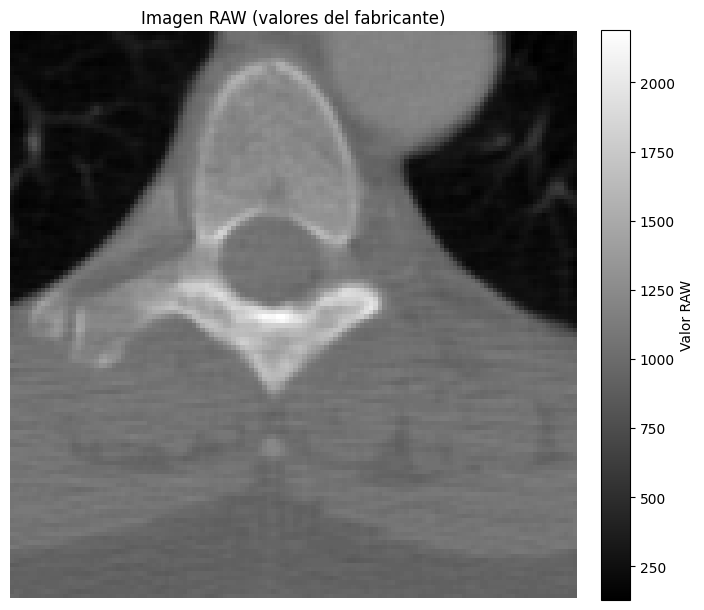

In [3]:
# Acceso a los datos crudos
raw_img = ds.pixel_array

print(f"Tipo de datos: {raw_img.dtype}")
print(f"Forma: {raw_img.shape}")
print(f"Rango RAW: {raw_img.min()} a {raw_img.max()}")

# Visualización de la imagen
plt.figure(figsize=(8, 8))
plt.imshow(raw_img, cmap='gray')
plt.colorbar(fraction=0.046, pad=0.04, label='Valor RAW')
plt.title("Imagen RAW (valores del fabricante)")
plt.axis('off')
plt.show()

En la imagen se aprecia la vértebra como una estructura hiperdensa (blanca) situada en la región central. Dado que los valores de esta imagen CT corresponden a datos crudos proporcionados por el equipo de adquisición, no están estandarizados ni son directamente comparables entre distintos equipos o fabricantes. Por ello, no resultan adecuados para realizar análisis cuantitativos directos y requieren una transformación posterior para obtener magnitudes físicas interpretables.

### *De píxeles a unidades físicas (Hounsfield)*

Para homogeneizar los valores de intensidad en una imagen CT, los valores RAW deben transformarse a **Unidades Hounsfield (HU)** mediante la recta de calibración definida en la propia cabecera DICOM.

$$
HU = PixelValue \cdot RescaleSlope + RescaleIntercept
$$

Tras esta conversión, el valor del agua es aproximadamente 0 HU y el del aire alrededor de −1000 HU, lo que permite comparar de forma consistente imágenes CT adquiridas con distintos equipos y protocolos. A continuación se muestra el código necesario para realizar esta conversión.

In [4]:
# Función para convertir valores DICOM a Unidades Hounsfield
def dicom_to_hu(ds, raw=None):
    """
    Convierte los valores de píxeles de un dataset DICOM a Unidades Hounsfield (HU).
    
    Args:
        ds: Dataset DICOM con RescaleSlope y RescaleIntercept
        raw: Array NumPy opcional con valores raw. Si es None, se obtiene de ds.pixel_array
    
    Returns:
        Array NumPy con valores en unidades Hounsfield
    """
    if raw is None:
        raw = ds.pixel_array
    
    slope = ds.RescaleSlope
    intercept = ds.RescaleIntercept
    hu = raw * slope + intercept
    return hu

Rescale Slope: 1
Rescale Intercept: -1024

Rango RAW: 128 a 2191
Rango HU:  -896.0 a 1167.0


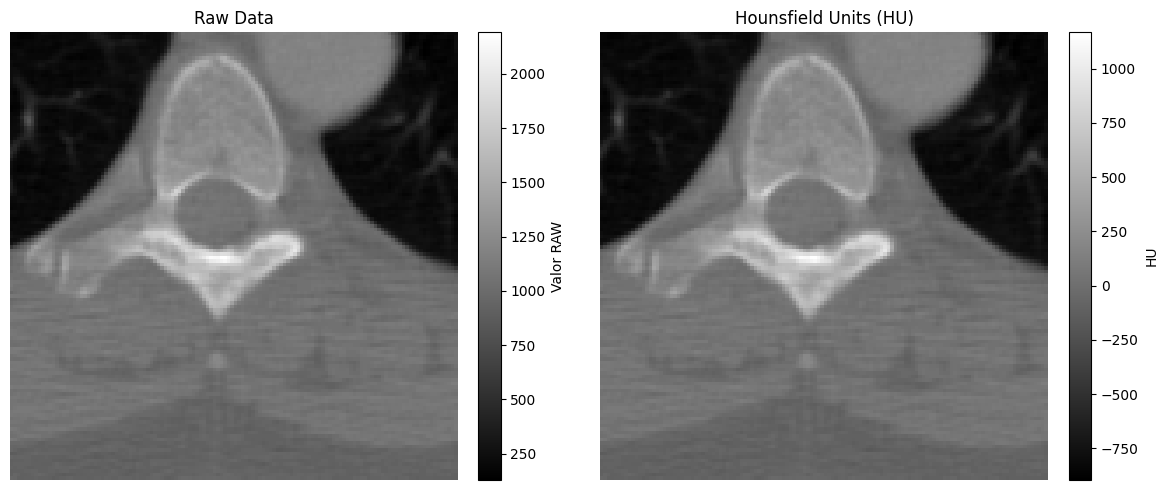

In [5]:
# Conversión a Unidades Hounsfield (HU)
hu_img = dicom_to_hu(ds, raw_img)

print(f"Rescale Slope: {ds.RescaleSlope}")
print(f"Rescale Intercept: {ds.RescaleIntercept}")
print(f"\nRango RAW: {raw_img.min()} a {raw_img.max()}")
print(f"Rango HU:  {hu_img.min():.1f} a {hu_img.max():.1f}")

# Visualización comparativa 
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
im0 = axes[0].imshow(raw_img, cmap="gray")
axes[0].set_title("Raw Data")
axes[0].axis("off")
fig.colorbar(im0, ax=axes[0], fraction=0.046, pad=0.04, label="Valor RAW")
im1 = axes[1].imshow(hu_img, cmap="gray")
axes[1].set_title("Hounsfield Units (HU)")
axes[1].axis("off")
fig.colorbar(im1, ax=axes[1], fraction=0.046, pad=0.04, label="HU")
plt.tight_layout()
plt.show()

A la izquierda se muestran los valores RAW de la imagen CT y, a la derecha, la misma imagen convertida a HU. Aunque a nivel visual las diferencias son poco apreciables, la estandarización de los valores permite interpretar cuantitativamente la densidad de los tejidos representados.

### *Ventaneo (Windowing)*

Como ya se ha visto, la conversión de una imagen CT a HU permite obtener valores estandarizados que abarcan aproximadamente desde −1000 (aire) hasta valores superiores a +3000 (hueso denso). Sin embargo, el ojo humano solo es capaz de distinguir en torno a un centenar de niveles de gris, de modo que si se intenta visualizar todo este rango en una única escala de grises, el resultado es una imagen con bajo contraste, en la que resulta difícil diferenciar adecuadamente los distintos tejidos.

Para resolver este problema se utiliza la técnica de **ventaneo (windowing)**. En lugar de visualizar todo el rango de valores, se selecciona una ventana centrada en los HU del tejido que se desea analizar. De esta forma, los valores comprendidos dentro de la ventana se expanden a lo largo de toda la escala de grises, mientras que los valores situados fuera de ella se saturan a negro o a blanco.

Una ventana se define mediante dos parámetros:
- **Centro (Level):** valor HU en el centro de la ventana
- **Ancho (Width):** rango de valores HU que se mostrarán

Existen ventanas preestablecidas, de carácter orientativo, según el tejido a examinar.

| Tejido | Centro | Ancho |
|--------|--------|-------|
| Pulmón | -600 | 1500 |
| Hueso | 400 | 2000 |
| Tejido Blando | 50 | 400 |
| Cerebro | 40 | 80 |

A continuación se muestra un ejemplo que ilustra el efecto del ventaneo sobre la visualización de la imagen CT.

In [6]:
# Función para aplicar ventaneo (windowing) a imágenes en unidades Hounsfield
def apply_window_hu(hu, center, width):
    """
    Aplica ventaneo (windowing) a una imagen en unidades Hounsfield.
    
    Args:
        hu: Array NumPy con valores en unidades Hounsfield
        center: Centro de la ventana (Level) en HU
        width: Ancho de la ventana (Window) en HU
    
    Returns:
        Array con valores normalizados al rango [0, 1] para visualización
    """
    min_value = center - (width / 2)
    max_value = center + (width / 2)
    windowed = np.clip(hu, min_value, max_value)
    # Normalizar al rango [0, 1] para visualización
    windowed_normalized = (windowed - min_value) / (max_value - min_value)
    return windowed_normalized

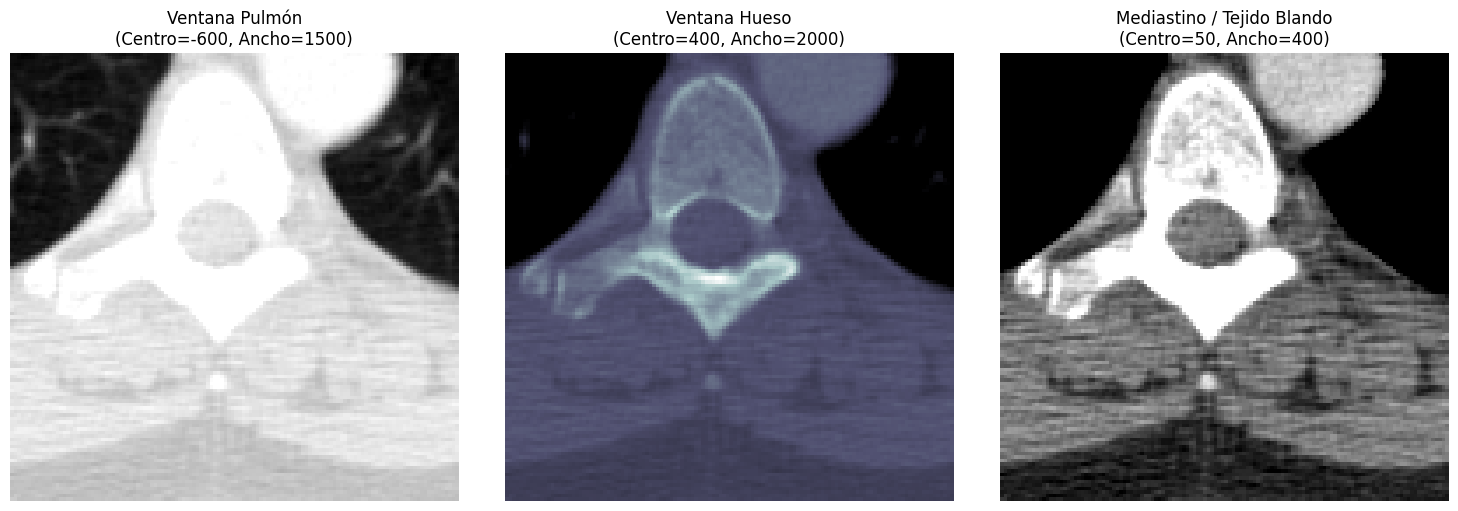

In [7]:
# Visualizamos diferentes tejidos usando la función
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Pulmón (W:1500, L:-600)
axes[0].imshow(apply_window_hu(hu_img, -600, 1500), cmap='gray')
axes[0].set_title("Ventana Pulmón\n(Centro=-600, Ancho=1500)")
axes[0].axis('off')

# Hueso (W:2000, L:400)
axes[1].imshow(apply_window_hu(hu_img, 400, 2000), cmap='bone')
axes[1].set_title("Ventana Hueso\n(Centro=400, Ancho=2000)")
axes[1].axis('off')

# Tejido Blando (W:400, L:50)
axes[2].imshow(apply_window_hu(hu_img, 50, 400), cmap='gray')
axes[2].set_title("Mediastino / Tejido Blando\n(Centro=50, Ancho=400)")
axes[2].axis('off')

plt.tight_layout()
plt.show()

Como puede observarse, una misma imagen CT puede mostrar información muy diferente en función de la ventana aplicada. La ventana de pulmón resalta las estructuras aéreas, la de hueso enfatiza el esqueleto y la de tejido blando permite examinar órganos y musculatura. Conviene resaltar que, en imagen médica, se emplea habitualmente el colormap `gray`, ya que es perceptualmente uniforme y evita artefactos visuales que pueden aparecer con mapas de color como `jet`.

El siguiente widget permite ajustar de forma interactiva el centro y el ancho de la ventana, mostrando en tiempo real su efecto sobre la visualización de la imagen CT.

In [8]:
# Widget interactivo para explorar diferentes ventanas
from ipywidgets import interact, IntSlider

def interactive_window(center, width):
    """Visualización interactiva con sliders para ajustar ventana"""
    windowed = apply_window_hu(hu_img, center, width)
    plt.figure(figsize=(8, 8))
    plt.imshow(windowed, cmap='gray')
    plt.title(f"Ventana: Centro={center} HU, Ancho={width} HU")
    plt.axis('off')
    plt.colorbar(label='Intensidad normalizada')
    plt.show()

print("WIDGET INTERACTIVO DE VENTANEO")
print("Ajusta los sliders para explorar diferentes ventanas:")
interact(interactive_window,
         center=IntSlider(min=-1000, max=1000, step=50, value=50, description='Centro'),
         width=IntSlider(min=100, max=3000, step=100, value=400, description='Ancho'))

WIDGET INTERACTIVO DE VENTANEO
Ajusta los sliders para explorar diferentes ventanas:


interactive(children=(IntSlider(value=50, description='Centro', max=1000, min=-1000, step=50), IntSlider(value…

<function __main__.interactive_window(center, width)>

Mediante la interacción con los deslizadores puede comprobarse cómo un centro de −600 con un ancho de 1500 resalta el pulmón, mientras que un centro de 400 con un ancho de 2000 hace más visible el hueso. Este tipo de herramienta es fundamental en la interpretación y el diagnóstico de imágenes CT.

### *Volúmenes 3D con DICOM*

En la mayoría de los estudios clínicos, DICOM almacena cada corte (slice) como un archivo `.dcm` independiente dentro de una misma serie. De este modo, para reconstruir el volumen 3D es necesario cargar todos los archivos y ordenarlos espacialmente, utilizando metadatos como `ImagePositionPatient` y `ImageOrientationPatient`, y recurriendo a `InstanceNumber` solo como criterio auxiliar.

Cabe destacar que el estándar DICOM también permite el formato multi-frame, en el que un único fichero contiene múltiples cortes o incluso el volumen completo. No obstante, en la tomografía computarizada clínica convencional sigue siendo habitual encontrar estudios fragmentados en numerosos archivos single-frame.

Aunque este diseño fragmentado es adecuado para la adquisición clínica, resulta poco eficiente para el procesamiento automático de los datos. En investigación y Deep Learning es preferible trabajar con volúmenes ya consolidados, con su geometría correctamente definida y almacenados en un único contenedor.


<div style="page-break-before: always;"></div>

<hr style="border: none; border-top: 2px solid #667eea; margin: 30px 0;">
<a class='anchor' id='nifti01'></a>

## <span style="color: #667eea;">Estándar NIfTI: Formato de Investigación</span>

NIfTI (*Neuroimaging Informatics Technology Initiative*) es un formato ampliamente utilizado en investigación para el almacenamiento de imágenes médicas. A diferencia de DICOM, que suele almacenar cada corte en un archivo independiente, NIfTI permite guardar el volumen 3D completo en un único archivo, lo que simplifica notablemente su procesamiento. Por este motivo, es el formato preferido en neuroimagen, análisis cuantitativo y Deep Learning, donde manejar grandes series de archivos individuales resulta poco práctico.

**Características principales:**
- Un solo archivo por volumen (`.nii` o `.nii.gz` comprimido)
- Metadatos geométricos: tamaño de voxel, orientación espacial, matriz affine
- Soporte para datos 3D y 4D (volúmenes temporales: fMRI, DCE-MRI)
- Sin información clínica del paciente (ya anonimizado)

### *Carga de un archivo NIfTI*

La carga de un archivo NIfTI es sencilla utilizando la librería `nibabel`. Este formato almacena tanto los datos volumétricos como una cabecera con información geométrica esencial. En particular, la **matriz affine** permite transformar coordenadas de voxel a coordenadas físicas expresadas en milímetros, lo que resulta fundamental para alinear imágenes de distintas modalidades y realizar mediciones espaciales en el sistema de referencia del paciente.

A continuación se carga un volumen de resonancia magnética (RM) de ejemplo:

In [9]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from nibabel.testing import data_path
import os

# Cargar archivo NIfTI de ejemplo (volumen 4D de fMRI)
nifti_path = os.path.join(data_path, 'example4d.nii.gz')
img_nii = nib.load(nifti_path)
data_nii = img_nii.get_fdata()

print(f"Archivo cargado: {os.path.basename(nifti_path)}")
print(f"Forma del volumen: {data_nii.shape}")
print(f"Tipo de datos: {data_nii.dtype}")
print(f"Rango de valores: [{data_nii.min():.1f}, {data_nii.max():.1f}]")

# Si es 4D (serie temporal), extraer el primer volumen 3D
if len(data_nii.shape) == 4:
    vol_3d = data_nii[:, :, :, 0]
    print(f"\nVolumen 3D extraído (primer instante temporal): {vol_3d.shape}")
else:
    vol_3d = data_nii

# Información geométrica del header
header = img_nii.header
voxel_size = header.get_zooms()[:3]
print(f"\nResolución espacial (tamaño de voxel): {voxel_size[0]:.2f} × {voxel_size[1]:.2f} × {voxel_size[2]:.2f} mm")

# Matriz Affine: clave para registrado y mediciones
print(f"\nMatriz Affine (voxel → coordenadas físicas mm):")
print(img_nii.affine)

# Orientación canónica (buena práctica)
img_canonical = nib.as_closest_canonical(img_nii)
vol_3d = img_canonical.get_fdata()
if len(vol_3d.shape) == 4:
    vol_3d = vol_3d[:, :, :, 0]
print(f"\nVolumen reorientado a forma canónica: {vol_3d.shape}")

Archivo cargado: example4d.nii.gz
Forma del volumen: (128, 96, 24, 2)
Tipo de datos: float64
Rango de valores: [0.0, 1162.0]

Volumen 3D extraído (primer instante temporal): (128, 96, 24)

Resolución espacial (tamaño de voxel): 2.00 × 2.00 × 2.20 mm

Matriz Affine (voxel → coordenadas físicas mm):
[[-2.00000000e+00  6.71471565e-19  9.08102451e-18  1.17855103e+02]
 [-6.71471565e-19  1.97371149e+00 -3.55528235e-01 -3.57229424e+01]
 [ 8.25548089e-18  3.23207617e-01  2.17108178e+00 -7.24879837e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]

Volumen reorientado a forma canónica: (128, 96, 24)


Como puede observarse, el volumen se carga en un único paso, obteniéndose directamente un array NumPy 3D (o 4D si incluye una dimensión temporal). La matriz affine permite situar el volumen en el espacio físico del paciente, lo que resulta fundamental para fusionar imágenes de distintas modalidades (por ejemplo, CT y RM) o para aplicaciones de navegación quirúrgica. La reorientación a una forma canónica garantiza que las coordenadas anatómicas sean consistentes, independientemente de cómo haya sido adquirida la imagen.

### *Visualización Ortogonal (Cortes Multiplanares)*

Un volumen 3D se visualiza típicamente mediante tres cortes ortogonales que permiten explorar la anatomía desde diferentes perspectivas: **axial** (vista desde arriba), **sagital** (vista desde el lado) y **coronal** (vista frontal). Esta visualización multiplanar es estándar en software médico y permite identificar estructuras anatómicas y patologías de forma eficiente.

El siguiente código ilustra cómo visualizar un volumen 3D mediante cortes axiales, sagitales y coronales.

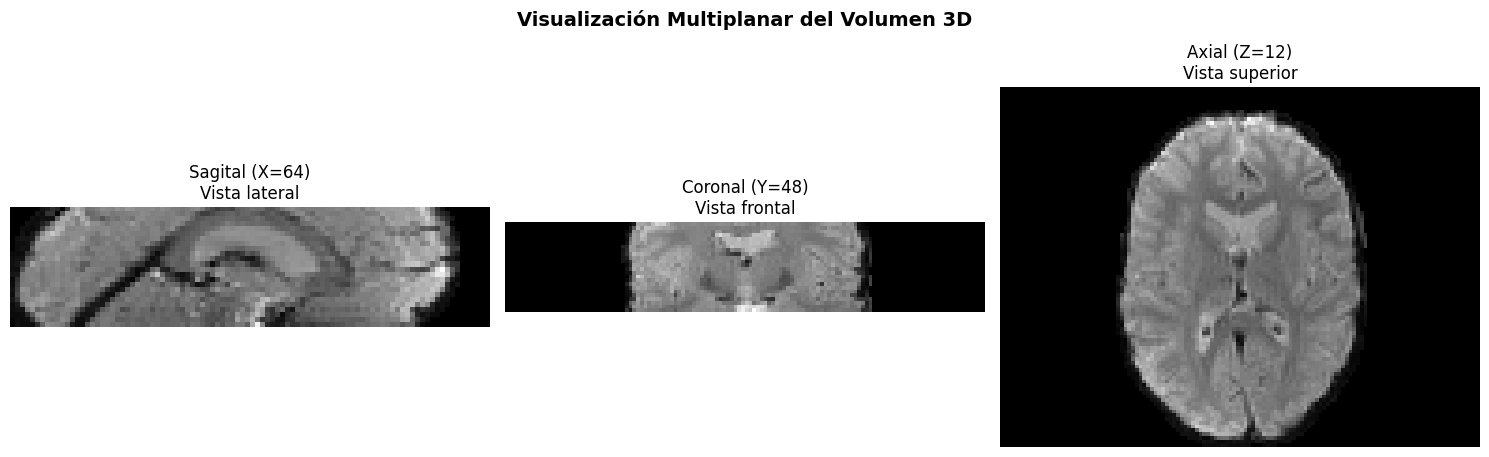

In [10]:
# Visualización multiplanar: Axial, Sagital, Coronal
mid_x, mid_y, mid_z = np.array(vol_3d.shape) // 2

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Sagital (corte en X: vista lateral)
axes[0].imshow(vol_3d[mid_x, :, :].T, cmap='gray', origin='lower')
axes[0].set_title(f"Sagital (X={mid_x})\nVista lateral", fontsize=12)
axes[0].axis('off')

# Coronal (corte en Y: vista frontal)
axes[1].imshow(vol_3d[:, mid_y, :].T, cmap='gray', origin='lower')
axes[1].set_title(f"Coronal (Y={mid_y})\nVista frontal", fontsize=12)
axes[1].axis('off')

# Axial (corte en Z: vista superior)
axes[2].imshow(vol_3d[:, :, mid_z].T, cmap='gray', origin='lower')
axes[2].set_title(f"Axial (Z={mid_z})\nVista superior", fontsize=12)
axes[2].axis('off')

plt.suptitle("Visualización Multiplanar del Volumen 3D", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

Las tres vistas ortogonales proporcionan una representación completa de la anatomía tridimensional. El uso de la transposición (`.T`) y del parámetro `origin='lower'` permite que las imágenes se muestren con una orientación visual coherente. No obstante, conviene tener en cuenta que Matplotlib es una librería de propósito general que no incorpora información anatómica. Aunque las imágenes puedan parecer correctas desde el punto de vista visual, esto no garantiza que la izquierda de la pantalla corresponda a la izquierda del paciente, debido a las diferencias entre las convenciones radiológicas y neurológicas.

Para un uso clínico real es imprescindible consultar la matriz affine del volumen y verificar la información de orientación almacenada en el header NIfTI, como `qform_code` y `sform_code`. Asimismo, es recomendable emplear visualizadores especializados que respeten las convenciones médicas. En investigación y Deep Learning este aspecto es crítico, ya que dos volúmenes pueden ser anatómicamente equivalentes pero estar invertidos en el array NumPy, dando lugar a errores silenciosos durante el entrenamiento de modelos.

### *Navegación Interactiva por Cortes*

Para explorar en detalle un volumen 3D, resulta útil poder navegar slice por slice a través de cualquiera de los tres ejes. Los widgets interactivos de Jupyter permiten crear visualizadores dinámicos que facilitan la inspección manual del volumen, identificación de artefactos y localización de regiones anatómicas específicas.

In [11]:
from ipywidgets import interact, IntSlider

def explorar_cortes_axiales(slice_idx):
    """Visualiza un corte axial específico del volumen"""
    plt.figure(figsize=(8, 8))
    plt.imshow(vol_3d[:, :, slice_idx].T, cmap='gray', origin='lower')
    plt.title(f"Corte Axial {slice_idx}/{vol_3d.shape[2]-1}", fontsize=14, fontweight='bold')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

print("NAVEGADOR INTERACTIVO DE CORTES AXIALES")
print(f"Usa el slider para recorrer los {vol_3d.shape[2]} cortes del volumen:\n")

interact(explorar_cortes_axiales,
         slice_idx=IntSlider(min=0, max=vol_3d.shape[2]-1, step=1,
                            value=vol_3d.shape[2]//2, description='Slice'))

NAVEGADOR INTERACTIVO DE CORTES AXIALES
Usa el slider para recorrer los 24 cortes del volumen:



interactive(children=(IntSlider(value=12, description='Slice', max=23), Output()), _dom_classes=('widget-inter…

<function __main__.explorar_cortes_axiales(slice_idx)>

La navegación interactiva permite examinar cada corte individualmente, lo que resulta útil para identificar detalles anatómicos finos, detectar artefactos de adquisición (ruido, movimiento) o verificar la calidad de una segmentación automática. Este tipo de herramientas es fundamental durante el desarrollo y la validación de algoritmos de análisis de imagen médica.

### *Conversión entre DICOM y NIfTI*

En la práctica es común necesitar convertir entre ambos formatos según el contexto de trabajo. Aunque técnicamente es posible realizar esta conversión con `pydicom` y `nibabel`, el proceso es manual y requiere construir cuidadosamente la matriz affine a partir de metadatos DICOM (ImageOrientationPatient, ImagePositionPatient, PixelSpacing, etc.), lo que es propenso a errores.

Para simplificar este proceso utilizaremos `SimpleITK`, una librería especializada que automatiza completamente la preservación de la geometría espacial durante la conversión.

In [12]:
import nibabel as nib
import SimpleITK as sitk
from pydicom.data import get_testdata_file

# Archivo DICOM de ejemplo
dicom_file = get_testdata_file("CT_small.dcm")

# Leer el archivo DICOM con SimpleITK
image_sitk = sitk.ReadImage(dicom_file)

print(f"Imagen DICOM cargada:")
print(f"  - Dimensiones: {image_sitk.GetSize()}")
print(f"  - Espaciado (mm): {image_sitk.GetSpacing()}")
print(f"  - Origen (mm): {image_sitk.GetOrigin()}")

# Guardar como NIfTI (el formato se detecta por la extensión)
# output_path = "/kaggle/working/converted.nii.gz"
output_path = "converted.nii.gz"
sitk.WriteImage(image_sitk, output_path)

# Verificar el archivo NIfTI generado con nibabel
nifti_img = nib.load(output_path)
print(f"\nVerificación con nibabel:")
print(f"  - Forma: {nifti_img.shape}")
print(f"  - Tamaño de voxel: {nifti_img.header.get_zooms()}")

Imagen DICOM cargada:
  - Dimensiones: (128, 128, 1)
  - Espaciado (mm): (0.661468, 0.661468, 5.0)
  - Origen (mm): (-158.135803, -179.035797, -75.699997)

Verificación con nibabel:
  - Forma: (128, 128, 1)
  - Tamaño de voxel: (np.float32(0.661468), np.float32(0.661468), np.float32(5.0))


La conversión de DICOM a NIfTI mediante SimpleITK es geométricamente correcta, ya que preserva el espaciado, el origen y la orientación del volumen. Sin embargo, implica una pérdida irreversible de los metadatos clínicos, ya que el archivo NIfTI resultante contiene únicamente los datos de imagen y su información geométrica, descartando información administrativa como el nombre del paciente, las fechas del estudio, los parámetros de adquisición del escáner o los identificadores únicos (UIDs).

Esta limitación es intencional: NIfTI está diseñado para entornos de investigación, donde los datos suelen estar anonimizados y los metadatos clínicos se gestionan externamente, normalmente mediante archivos CSV o bases de datos que relacionan identificadores de imagen con información del paciente.

La conversión inversa, de NIfTI a DICOM, es técnicamente posible mediante `sitk.WriteImage(image_sitk, "salida.dcm")`, pero genera un archivo DICOM carente de la mayoría de los metadatos obligatorios según el estándar. Para que dicho archivo sea clínicamente utilizable sería necesario rellenar manualmente numerosos campos requeridos (Modality, PatientName, StudyInstanceUID, SeriesInstanceUID, fechas, etc.), un proceso que en la práctica solo se aborda cuando es imprescindible integrar resultados de investigación en sistemas PACS hospitalarios.

<div style="page-break-before: always;"></div>

<hr style="border: none; border-top: 2px solid #667eea; margin: 30px 0;">
<a class='anchor' id='datos01'></a>

## <span style="color: #667eea;">Datos Reales desde Kaggle</span>

Kaggle permite añadir datasets públicos de imagen médica directamente a un notebook. Los archivos se montan automáticamente en `/kaggle/input/` sin descargas ni consumo de espacio, facilitando el trabajo con grandes volúmenes de datos.

**Pasos para añadir un dataset:**

1. Accede a [kaggle.com/datasets](https://www.kaggle.com/datasets) y busca por nombre o palabras clave ("brain MRI", "CT scan", etc.) para localizar el dataset
2. En el notebook, haz clic en **"+ Add Input"** (panel derecho), busca el dataset y haz clic en el botón añadir (**"+"**)
3. Accede a los archivos en `/kaggle/input/nombre-del-dataset/` usando `os.listdir()` o `glob.glob()`

A continuación se muestran dos ejemplos prácticos con radiología de tórax (DICOM) y resonancia magnética cerebral (NIfTI).

### *Radiografías de Tórax (DICOM)*

El dataset [RSNA Pneumonia Detection Challenge](https://www.kaggle.com/c/rsna-pneumonia-detection-challenge/data) contiene radiografías de tórax en formato DICOM. Es útil para familiarizarse con archivos DICOM reales, extraer metadatos clínicos y trabajar con imágenes 2D de modalidades proyectivas.

Total archivos DICOM: 29684

Archivo 1:
  Modalidad: CR
  Dimensiones: 1024 x 1024

Archivo 2:
  Modalidad: CR
  Dimensiones: 1024 x 1024

Archivo 3:
  Modalidad: CR
  Dimensiones: 1024 x 1024


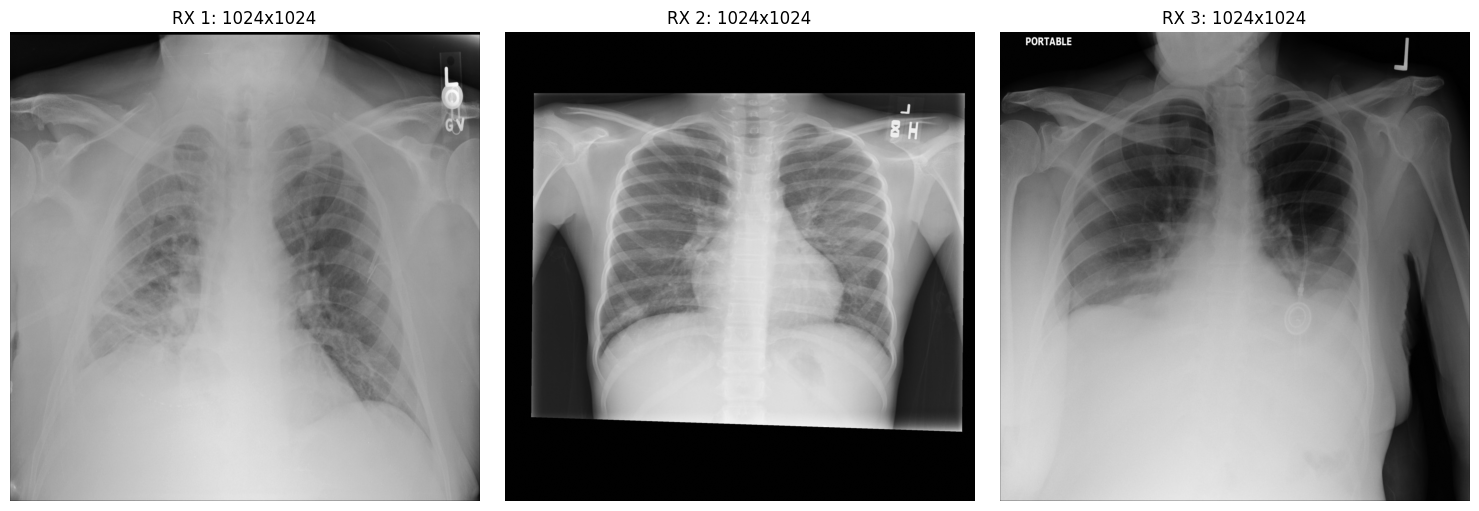

In [13]:
import pydicom
import os
import glob

# Ruta al dataset (debe añadirse previamente desde el panel "+ Add Input" marcando el tag "Competition Datasets")
dataset_path = "rsna-pneumonia-detection-challenge/"

if os.path.exists(dataset_path):
    # Buscar archivos DICOM
    dicom_files = glob.glob(os.path.join(dataset_path, '**/*.dcm'), recursive=True)
    print(f"Total archivos DICOM: {len(dicom_files)}")
    
    if len(dicom_files) > 0:
        # Cargar algunos ejemplos
        ejemplos = dicom_files[:3]
        
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))
        
        for i, dcm_path in enumerate(ejemplos):
            ds = pydicom.dcmread(dcm_path)
            img = ds.pixel_array
            
            axes[i].imshow(img, cmap='gray')
            axes[i].set_title(f"RX {i+1}: {ds.Rows}x{ds.Columns}")
            axes[i].axis('off')
            
            # Mostrar algunos metadatos
            print(f"\nArchivo {i+1}:")
            print(f"  Modalidad: {ds.Modality}")
            print(f"  Dimensiones: {ds.Rows} x {ds.Columns}")
        
        plt.tight_layout()
        plt.show()
else:
    print("¡Dataset no encontrado!") 
    print("Añádelo con '+ Add Input', marcando el tag 'Competition Datasets' y buscando 'RSNA Pneumonia Detection Challenge'")

### *Resonancias Magnéticas Cerebrales (NIfTI)*

El dataset [Brats2020 Nifti format for DeepMedic](https://www.kaggle.com/datasets/darksteeldragon/brats2020-nifti-format-for-deepmedic) contiene volúmenes de RM cerebral en formato NIfTI. Permite practicar con archivos volumétricos 3D, visualización multiplanar y análisis de geometría espacial.

Total archivos NIfTI: 2346

Dimensiones del volumen: (240, 240, 155)
Tamaño de voxel: (np.float32(1.0), np.float32(1.0), np.float32(1.0)) mm


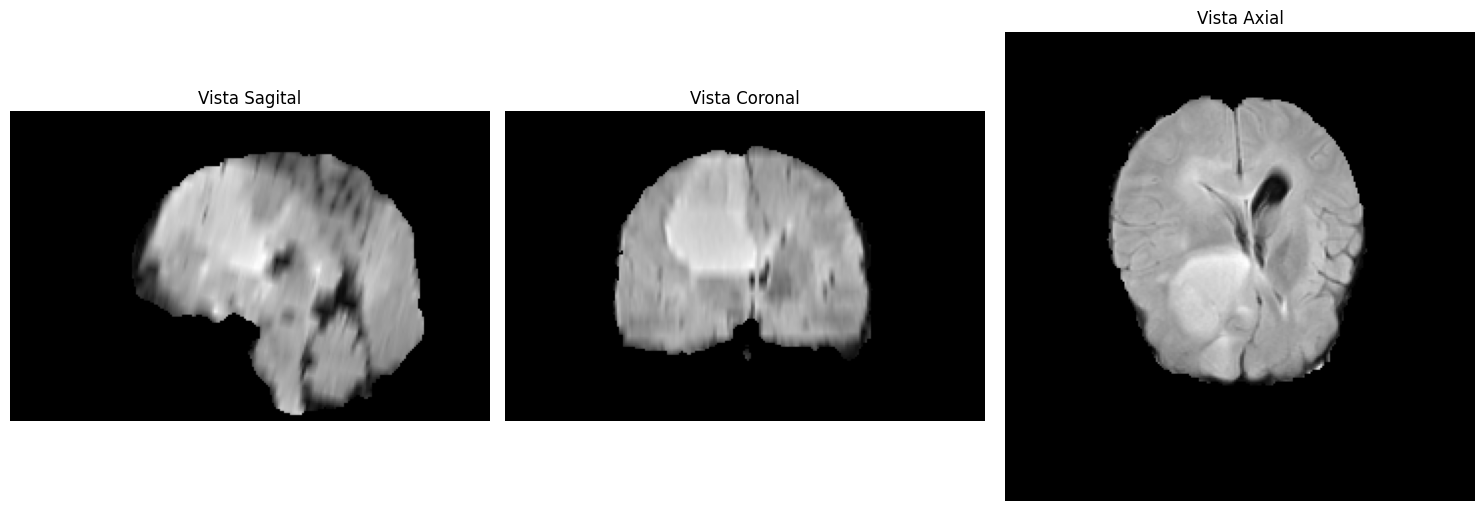

In [14]:
import nibabel as nib
import os
import glob
import numpy as np
import matplotlib.pyplot as plt

# Ruta al dataset (debe añadirse previamente desde el panel "+ Add Input" marcando el tag "Datasets")
dataset_path = "brats2020-nifti-format-for-deepmedic" 

if os.path.exists(dataset_path):
    # Buscar archivos NIfTI
    nifti_files = glob.glob(os.path.join(dataset_path, '**/*.nii*'), recursive=True)
    print(f"Total archivos NIfTI: {len(nifti_files)}")

    if len(nifti_files) > 0:
        # Cargar el primer volumen
        img = nib.load(nifti_files[0])
        vol = img.get_fdata()

        print(f"\nDimensiones del volumen: {vol.shape}")
        print(f"Tamaño de voxel: {img.header.get_zooms()[:3]} mm")

        # Visualización multiplanar
        mid_x, mid_y, mid_z = np.array(vol.shape) // 2

        fig, axes = plt.subplots(1, 3, figsize=(15, 5))

        axes[0].imshow(vol[mid_x, :, :].T, cmap='gray', origin='lower')
        axes[0].set_title("Vista Sagital")
        axes[0].axis('off')

        axes[1].imshow(vol[:, mid_y, :].T, cmap='gray', origin='lower')
        axes[1].set_title("Vista Coronal")
        axes[1].axis('off')

        axes[2].imshow(vol[:, :, mid_z].T, cmap='gray', origin='lower')
        axes[2].set_title("Vista Axial")
        axes[2].axis('off')

        plt.tight_layout()
        plt.show()
    else:
        print("No se encontraron archivos NIfTI en el dataset")
else:
    print("¡Dataset no encontrado!") 
    print("Añádelo con '+ Add Input', marcando el tag 'Datasets' y buscando 'Brats2020 Nifti format for DeepMedic'")

### *Flujo de Trabajo Típico con Datasets*

Una vez familiarizado con la carga de datos desde Kaggle, el flujo típico de trabajo es:

1. **Exploración**: Añadir dataset, explorar estructura de directorios y tipos de archivo
2. **Carga**: Utilizar `pydicom` para DICOM o `nibabel` para NIfTI según corresponda
3. **Visualización**: Inspeccionar imágenes para verificar calidad y detectar artefactos
4. **Preprocesamiento**: Normalizar intensidades, reorientar volúmenes, recortar regiones de interés
5. **Análisis/Entrenamiento**: Aplicar algoritmos de segmentación, clasificación o Deep Learning

La integración de Kaggle con notebooks facilita el acceso a grandes volúmenes de datos médicos públicos sin necesidad de descargarlos localmente, acelerando significativamente el desarrollo de proyectos de investigación y aplicaciones de IA médica.

<div style="page-break-before: always;"></div>

<hr style="border: none; border-top: 2px solid #667eea; margin: 30px 0;">
<a class='anchor' id='ejercicios01'></a>

## <span style="color: #667eea;">Ejercicios Prácticos</span>

### *Ejercicio 1. Comparación de Ventanas en CT*

Como ya sabes, el ventaneo permite resaltar diferentes tejidos en una misma imagen CT ajustando el centro y el ancho de la ventana de visualización. Crea una función `visualize_windows(hu_image, windows)` que reciba una imagen CT en unidades Hounsfield y una lista de tuplas `(nombre, centro, ancho)` representando diferentes ventanas. La función debe crear una rejilla mostrando la imagen con cada ventana aplicada. Prueba con ventanas típicas: pulmón (-600, 1500), tejido blando (50, 400), hueso (400, 2000) y cerebro (40, 80).

<details>
<summary>💡 Pista</summary>
Usa la función <code>apply_window_hu()</code> que ya está definida anteriormente. Calcula el número de filas y columnas con <code>int(np.ceil(np.sqrt(num_windows)))</code> para distribuir las ventanas en una rejilla cuadrada.
</details>

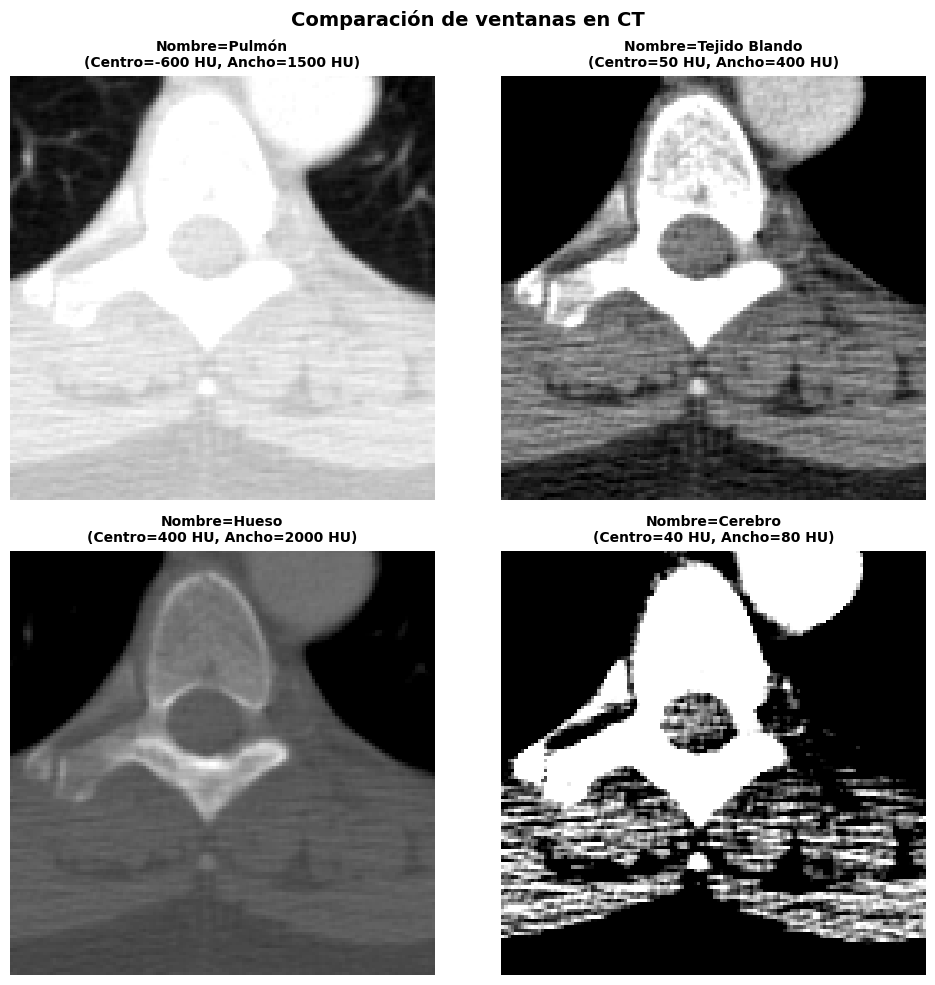

In [15]:
# SOLUCIÓN DEL EJERCICIO 1
def visualize_windows(hu_image, windows):
    """
    Visualiza una imagen CT con diferentes ventanas aplicadas.

    Args:
        hu_image: Array NumPy con valores en unidades Hounsfield
        windows: Lista de tuplas (nombre, centro, ancho)
    """
    num_windows = len(windows)

    # Calcular dimensiones de la rejilla (lo más cuadrada posible)
    ncols = int(np.ceil(np.sqrt(num_windows)))
    nrows = int(np.ceil(num_windows / ncols))

    # Crear figura
    fig, axes = plt.subplots(nrows, ncols, figsize=(5*ncols, 5*nrows))

    # Asegurar que axes siempre sea un array
    if num_windows == 1:
        axes = np.array([axes])
    axes = axes.flatten()

    # Aplicar cada ventana
    for i, (nombre, centro, ancho) in enumerate(windows):
        windowed_img = apply_window_hu(hu_image, centro, ancho)

        axes[i].imshow(windowed_img, cmap='gray')
        axes[i].set_title(f"Nombre={nombre}\n(Centro={centro} HU, Ancho={ancho} HU)",
                          fontsize=10, fontweight="bold")
        axes[i].axis('off')

    # Ocultar los subplots vacíos
    for i in range(num_windows, len(axes)):
        axes[i].axis('off')

    plt.suptitle("Comparación de ventanas en CT", fontsize=14, fontweight="bold")
    plt.tight_layout()
    plt.show()

# Prueba con ventanas típicas
windows = [
    ("Pulmón", -600, 1500),
    ("Tejido Blando", 50, 400),
    ("Hueso", 400, 2000),
    ("Cerebro", 40, 80)
]

visualize_windows(hu_img, windows)

### *Ejercicio 2. Anonimización de Pacientes (RGPD)*

Los datos médicos contienen información sensible protegida por el RGPD. En este ejercicio aprenderás a anonimizar archivos DICOM eliminando datos identificativos del paciente. Carga el archivo `CT_small.dcm` y crea una función `anonymize_dicom(dataset)` que modifique los campos `PatientName`, `PatientID`, `PatientBirthDate` y `PatientSex`, reemplazándolos por valores anonimizados o cadenas vacías. Muestra por consola los valores antes y después de la anonimización, y guarda el archivo modificado como `anon_ct.dcm`.

>*NOTA: En la práctica real, la anonimización de estudios DICOM es un proceso delicado y no basta con eliminar algunos campos evidentes. Pueden existir identificadores sensibles tanto en metadatos estándar y privados como en el propio contenido de la imagen, por lo que en entornos clínicos o de investigación regulada es imprescindible utilizar herramientas y procedimientos especializados.*

<details>
<summary>💡 Pista</summary>
Usa <code>dataset.PatientName = "ANONIMIZADO"</code> para modificar los campos. No olvides trabajar sobre una copia del dataset original con <code>ds.copy()</code> o recargando el archivo.<br><br>
</details>

In [16]:
# SOLUCIÓN DEL EJERCICIO 2
def anonymize_dicom(dataset):
    """
    Anonimiza un dataset DICOM eliminando información indentificativa del paciente.

    Args:
        dataset: Dataset DICOM de pydicom

    Returns:
        Dataset DICOM anonimizado
    """
    # Campos a anonimizar según RGPD
    dataset.PatientName = "ANONIMIZADO"
    dataset.PatientID = "ANON_ID"
    dataset.PatientBirthDate = ""
    dataset.PatientSex = ""

    # Campos adicionales que podrían contener información sensible
    if hasattr(dataset, "PatientAddress"):
        dataset.PatientAddress = ""
    if hasattr(dataset, 'InstitutionName'):
        dataset.InstitutionName = "ANONIMIZADO"
    if hasattr(dataset, "ReferringPhysicianName"):
        dataset.ReferringPhysicianName = "ANONIMIZADO"

    return dataset

# Cargar el archivo DICOM original
from pydicom.data import get_testdata_file
filename = get_testdata_file("CT_small.dcm")
ds_original = pydicom.dcmread(filename)

print("=" * 60)
print("Datos antes de la anonimización")
print("=" * 60)
print(f"Nombre del paciente:    {ds_original.PatientName}")
print(f"ID del paciente:        {ds_original.PatientID}")
print(f"Fecha de nacimiento:    {ds_original.PatientBirthDate}")
print(f"Sexo:                   {ds_original.PatientSex}")

# Crear una copia para anonimizar
ds_anon = pydicom.dcmread(filename)

# Aplicar anonimización
ds_anon = anonymize_dicom(ds_anon)

print("\n" + "=" * 60)
print("Datos después de la anonimización")
print("=" * 60)
print(f"Nombre del paciente:    {ds_anon.PatientName}")
print(f"ID del paciente:        {ds_anon.PatientID}")
print(f"Fecha de nacimiento:    {ds_anon.PatientBirthDate}")
print(f"Sexo:                   {ds_anon.PatientSex}")

# Guardar el archivo anonimizado
output_file = "anon_ct.dcm"
ds_anon.save_as(output_file)
print(f"Archivo anonimizado guardado como: {output_file}")

# Verificar que el archivo anonimizado se guardó correctamente
ds_verificacion = pydicom.dcmread(output_file)
print("\n" + "=" * 60)
print("Verificación del archivo guardado")
print("=" * 60)
print(f"Nombre del paciente:    {ds_verificacion.PatientName}")
print(f"ID del paciente:        {ds_verificacion.PatientID}")
print(f"Fecha de nacimiento:    {ds_verificacion.PatientBirthDate}")
print(f"Sexo:                   {ds_verificacion.PatientSex}")

Datos antes de la anonimización
Nombre del paciente:    CompressedSamples^CT1
ID del paciente:        1CT1
Fecha de nacimiento:    
Sexo:                   O

Datos después de la anonimización
Nombre del paciente:    ANONIMIZADO
ID del paciente:        ANON_ID
Fecha de nacimiento:    
Sexo:                   
Archivo anonimizado guardado como: anon_ct.dcm

Verificación del archivo guardado
Nombre del paciente:    ANONIMIZADO
ID del paciente:        ANON_ID
Fecha de nacimiento:    
Sexo:                   


### *Ejercicio 3. Proyección de Máxima Intensidad (MIP)*

La proyección de máxima intensidad (MIP) es una técnica que permite visualizar estructuras brillantes (como vasos sanguíneos contrastados) en un volumen 3D proyectando el valor máximo a lo largo de un eje. Usando el volumen NIfTI cargado en la práctica (`vol_3d`), calcula la proyección máxima y la proyección media a lo largo del eje Z con NumPy. Visualiza ambas imágenes lado a lado y reflexiona: ¿qué diferencias observas entre ambas proyecciones y qué tipo de estructuras se resaltan más en el MIP?

<details>
<summary>💡 Pista</summary>
Usa <code>np.max(vol_3d, axis=2)</code> para la proyección máxima y <code>np.mean(vol_3d, axis=2)</code> para la proyección media. El parámetro <code>axis=2</code> indica el eje Z. Recuerda usar <code>.T</code> y <code>origin='lower'</code> para la visualización correcta.
</details>

Proyecciones del volumen 3D
Dimensiones del volumen original: (128, 96, 24)
Dimensiones de las proyecciones: (128, 96)

Estadísticos de la proyección MIP:
    - Rango: [0.00, 1162.00]
    - Media: 241.53

Estadísticas de la proyección media:
    - Rango: [0.00, 667.83]
    - Media: 172.91


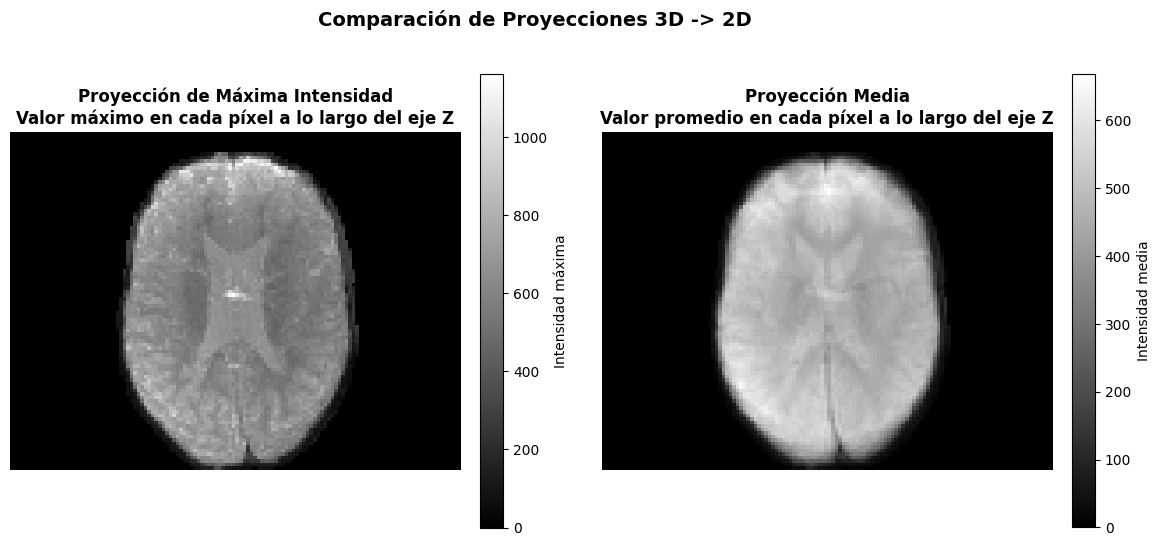

In [17]:
# SOLUCIÓN DEL EJERCICIO 3
# Calcular proyecciones a lo largo del eje Z
mip_projection = np.max(vol_3d, axis=2) # Proyección de máxima intensidad
mean_projection = np.mean(vol_3d, axis=2) # Proyección media

print("Proyecciones del volumen 3D")
print("=" * 60)
print(f"Dimensiones del volumen original: {vol_3d.shape}")
print(f"Dimensiones de las proyecciones: {mip_projection.shape}")
print("\nEstadísticos de la proyección MIP:")
print(f"    - Rango: [{mip_projection.min():.2f}, {mip_projection.max():.2f}]")
print(f"    - Media: {mip_projection.mean():.2f}")
print("\nEstadísticas de la proyección media:")
print(f"    - Rango: [{mean_projection.min():.2f}, {mean_projection.max():.2f}]")
print(f"    - Media: {mean_projection.mean():.2f}")

# Visualización comparativa
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Proyección de máxima intensidad (MIP)
im1 = axes[0].imshow(mip_projection.T, cmap="gray", origin="lower")
axes[0].set_title("Proyección de Máxima Intensidad\nValor máximo en cada píxel a lo largo del eje Z",
                  fontsize=12, fontweight="bold")
axes[0].axis('off')
plt.colorbar(im1, ax=axes[0], fraction=0.046, pad=0.04, label="Intensidad máxima")

# Proyección media
im2 = axes[1].imshow(mean_projection.T, cmap="gray", origin="lower")
axes[1].set_title("Proyección Media\nValor promedio en cada píxel a lo largo del eje Z",
                  fontsize=12, fontweight="bold")
axes[1].axis('off')
plt.colorbar(im2, ax=axes[1], fraction=0.046, pad=0.04, label="Intensidad media")

plt.suptitle("Comparación de Proyecciones 3D -> 2D", fontsize=14, fontweight="bold")
plt.show()

**Diferencias Observadas:**

1. Contraste:
  - MIP: Mayor contraste, estructuras brillantes muy destacadas.
  - Media: Menos contraste, distribución más suave de intensidades.

2. Estructuras resaltadas en MIP:
  - Bordes del cráneo (alta intensidad)
  - Líquido cefalorraquídeo (señal brillante en T2)
  - Vasos sanguíneos con contraste
  - Cualquier estructura de alta señal a lo largo del recorrido

3. Ventajas del MIP:
  <ul style="list-style: none; padding-left: 1;">
      <li>&#10003; Ideal para angiografía (visualizar vasos sanguíneos)</li>
      <li>&#10003; Resalta calcificaciones y estructuras densas</li>
      <li>&#10003; Útil para detectar lesiones hiperintensas</li>
  </ul>

4. Ventajas de la proyección media:
  <ul style="list-style: none; padding-left: 1;">
      <li>&#10003; Reduce ruido y artefactos</li>
      <li>&#10003; Mejor representación global del volumen</li>
      <li>&#10003; Preserva información de tejidos intermedios</li>
  </ul>

5. Aplicaciones clínicas del MIP:
  - Angiografía por RM (ARM) / Angiografía por CT (CTA)
  - Detección de microcalcificaciones en mamografía
  - Visualización de árbol bronquial en CT de tórax
  - Planificación quirúrgica vascular

### *Ejercicio 4. Creación de un Mosaico de Cortes*

Visualizar múltiples cortes consecutivos en una rejilla facilita la inspección rápida de un volumen 3D completo. Crea un código que genere un mosaico de 4x4 (16 cortes) mostrando cortes axiales distribuidos uniformemente a lo largo del eje Z del volumen NIfTI. Usa `plt.subplots(4, 4)` para crear la rejilla y asegúrate de que cada subplot muestre el número de corte correspondiente en el título. Oculta los ejes para una visualización limpia.

<details>
<summary>💡 Pista</summary>
Usa <code>np.linspace(0, vol_3d.shape[2]-1, 16, dtype=int)</code> para seleccionar 16 índices distribuidos uniformemente. Convierte el array de ejes con <code>axes.flatten()</code> para iterar fácilmente.
</details>

Mosaico de cortes axiales
Volumen completo: (128, 96, 24)
Cortes seleccionados: [ 0  1  3  4  6  7  9 10 12 13 15 16 18 19 21 23]
Distribuidos uniformemente a lo largo de 24 cortes totales



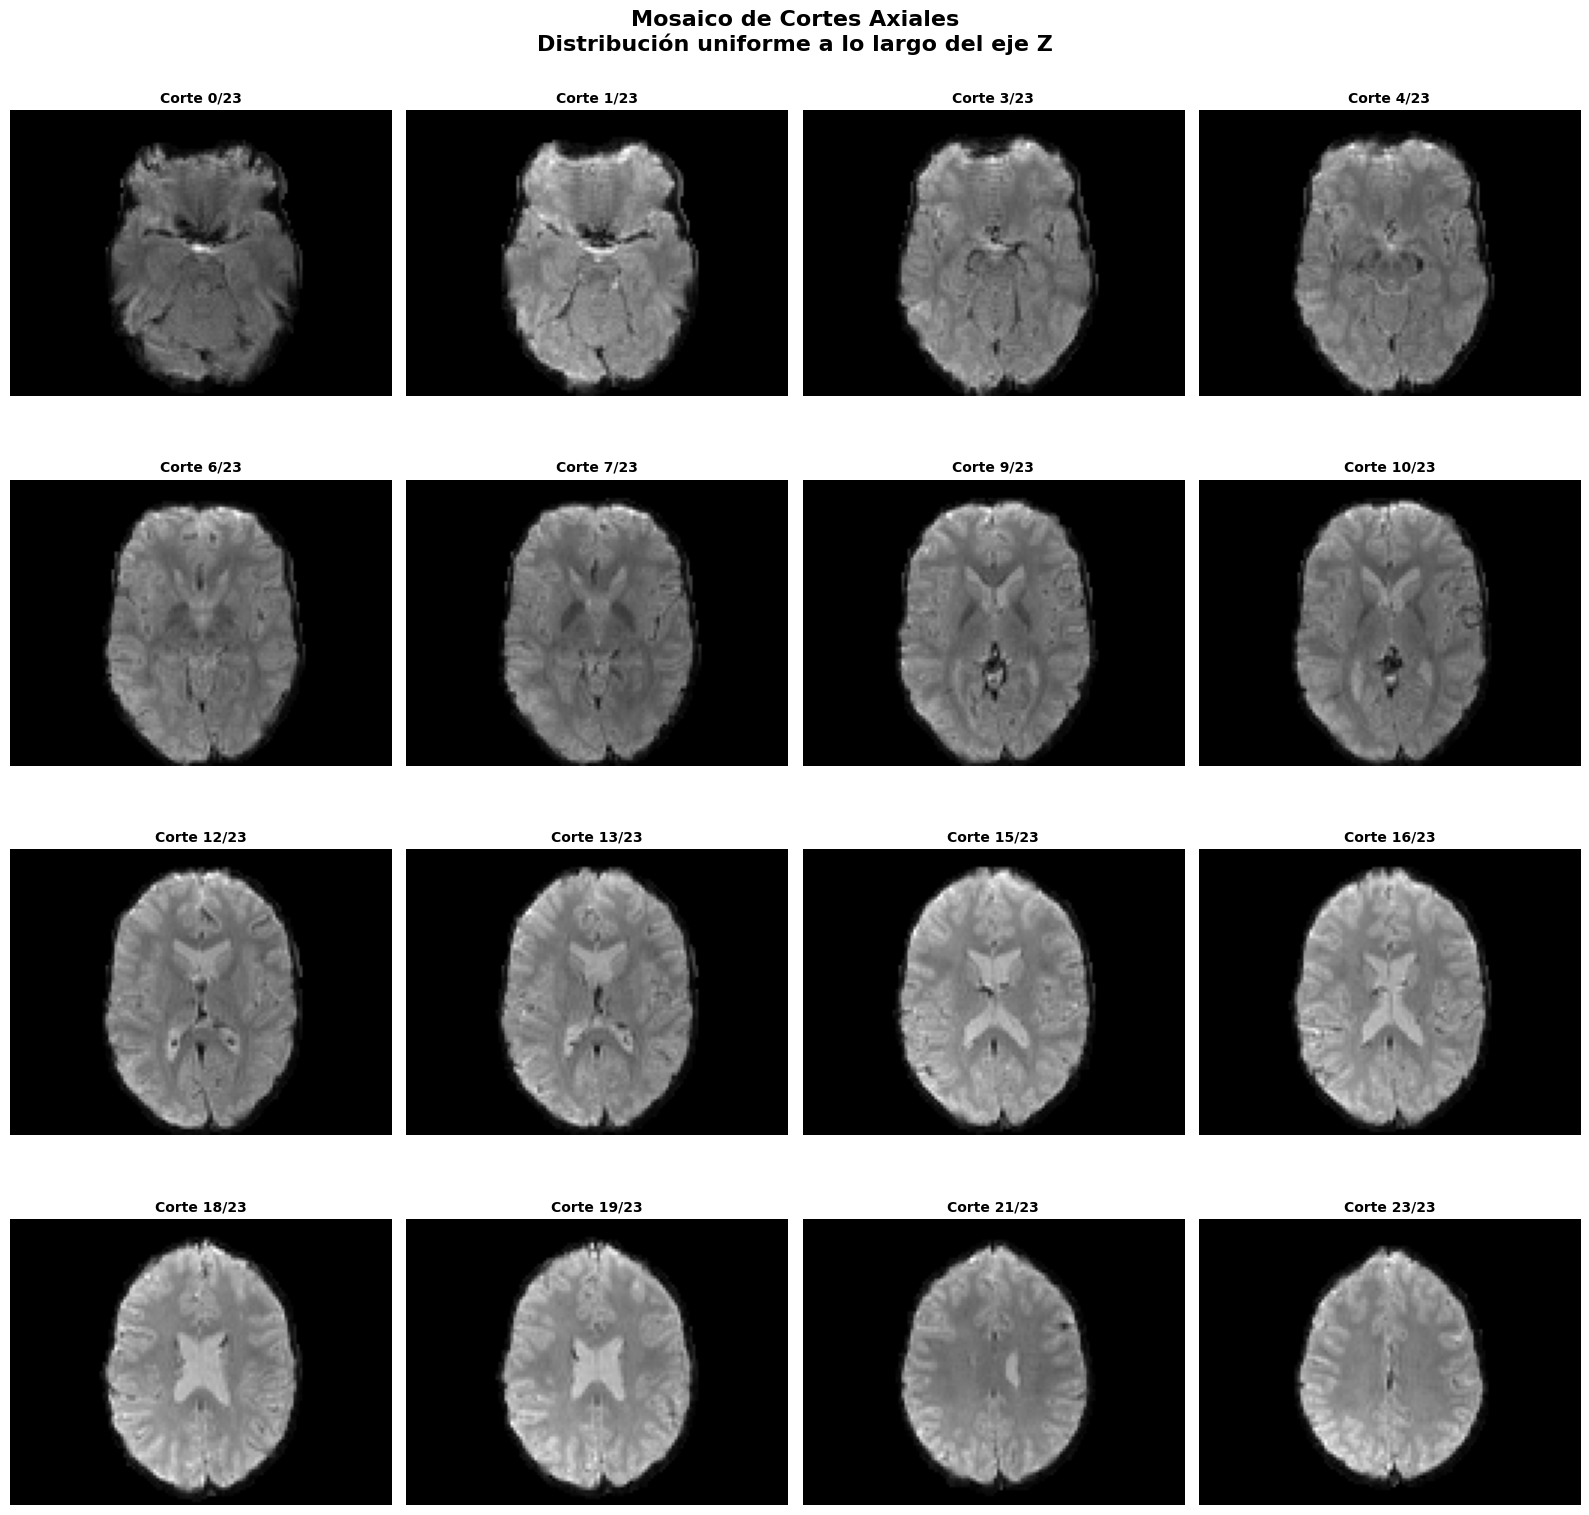

In [18]:
# SOLUCIÓN DEL EJERCICIO 4
# Seleccionar 16 índices distribuidos uniformemente a lo largo del eje Z
slice_indices = np.linspace(0, vol_3d.shape[2]-1, 16, dtype=int)

print("Mosaico de cortes axiales")
print(f"Volumen completo: {vol_3d.shape}")
print(f"Cortes seleccionados: {slice_indices}")
print(f"Distribuidos uniformemente a lo largo de {vol_3d.shape[2]} cortes totales\n")

# Crear figura con rejilla 4x4
fig, axes = plt.subplots(4, 4, figsize=(16, 16))

# Aplanar el array de ejes para iterar fácilmente
axes_flat = axes.flatten()

# Iterar sobre los 16 cortes seleccionados
for idx, slice_num in enumerate(slice_indices):
    # Extraer el corte axial
    slice_img = vol_3d[:, :, slice_num]

    # Mostrar la imagen en el subplot correspondiente
    axes_flat[idx].imshow(slice_img.T, cmap="gray", origin="lower")
    axes_flat[idx].set_title(f"Corte {slice_num}/{vol_3d.shape[2]-1}",
                             fontsize=10, fontweight="bold")
    axes_flat[idx].axis('off')

# Título general del mosaico
plt.suptitle("Mosaico de Cortes Axiales\nDistribución uniforme a lo largo del eje Z",
             fontsize=16, fontweight="bold")

plt.tight_layout()
plt.show()

### *Ejercicio 5. Estadísticas de un Volumen 3D*

Analizar las propiedades estadísticas de un volumen médico proporciona información valiosa sobre la distribución de intensidades y ayuda a detectar artefactos o valores anómalos. Usando el volumen NIfTI cargado previamente (`vol_3d`), calcula estadísticas descriptivas básicas: media, mediana, desviación estándar, mínimo, máximo y percentiles 25, 50 y 75. Crea un histograma de la distribución de intensidades marcando con líneas verticales la media, mediana y percentil 75. Además, visualiza un corte axial resaltando en rojo los píxeles cuya intensidad supera el percentil 75.

<details>
<summary>💡 Pista</summary>
Usa <code>vol_3d.flatten()</code> para convertir el volumen 3D en un array 1D antes de calcular el histograma. Crea una máscara booleana con <code>mask = slice > np.percentile(vol_3d, 75)</code> para identificar valores altos. Usa <code>plt.axvline()</code> para marcar valores en el histograma.
</details>

ESTADÍSTICAS DESCRIPTIVAS DEL VOLUMEN 3D
Dimensiones del volumen: (128, 96, 24)
Total de vóxeles:        294,912

Medidas de tendencia central:
  - Media:               172.91
  - Mediana:             0.00

Medidas de dispersión:
  - Desviación estándar: 238.80
  - Mínimo:              0.00
  - Máximo:              1162.00
  - Rango:               1162.00

Percentiles:
  - Percentil 25 (Q1):   0.00
  - Percentil 50 (Q2):   0.00
  - Percentil 75 (Q3):   435.00
  - Rango intercuartil:  435.00


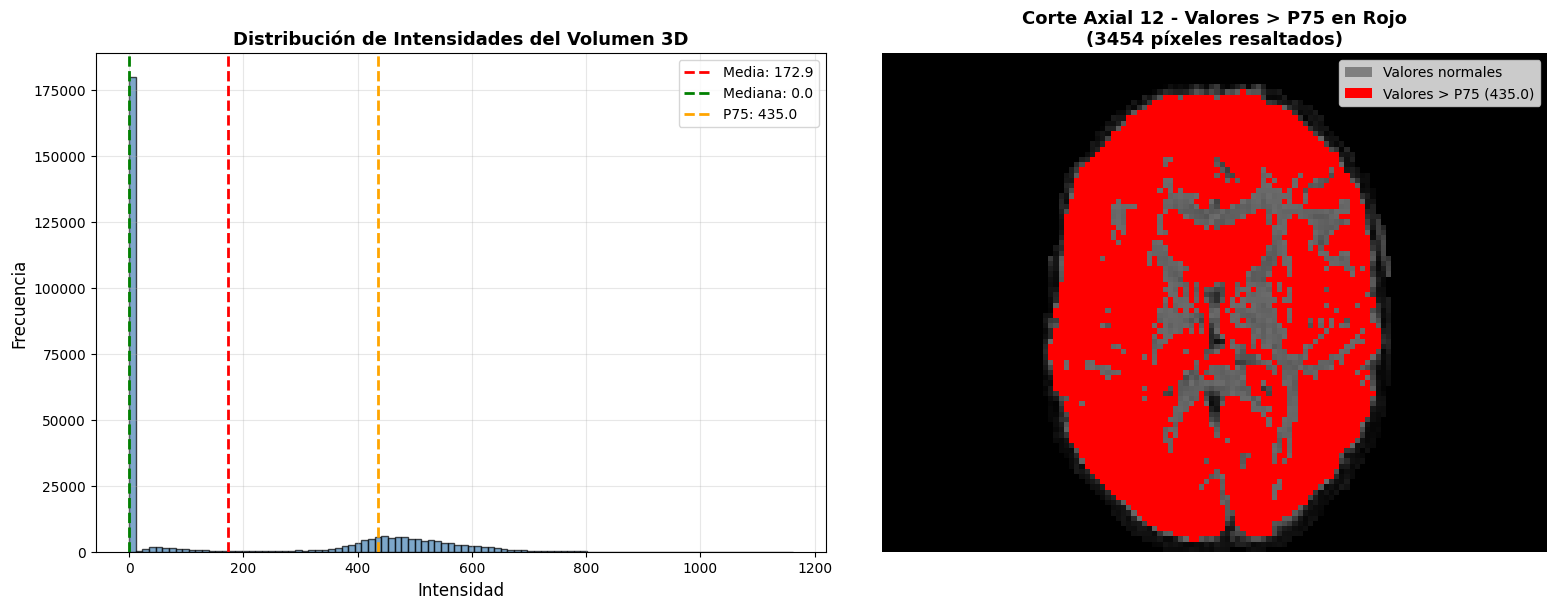


ANÁLISIS DE LA DISTRIBUCIÓN
Vóxeles por encima del P75: 73,695 (24.99%)
Vóxeles en el corte central > P75: 3454

Asimetría (skewness): 0.826
Curtosis (kurtosis):  -1.025
  → Distribución sesgada a la derecha (cola larga hacia valores altos)


In [19]:
# SOLUCIÓN DEL EJERCICIO 5
# Calcular estadísticas descriptivas del volumen 3D
media = np.mean(vol_3d)
mediana = np.median(vol_3d)
desv_std = np.std(vol_3d)
minimo = np.min(vol_3d)
maximo = np.max(vol_3d)
percentil_25 = np.percentile(vol_3d, 25)
percentil_50 = np.percentile(vol_3d, 50)  # Equivalente a la mediana
percentil_75 = np.percentile(vol_3d, 75)

print("=" * 60)
print("ESTADÍSTICAS DESCRIPTIVAS DEL VOLUMEN 3D")
print("=" * 60)
print(f"Dimensiones del volumen: {vol_3d.shape}")
print(f"Total de vóxeles:        {vol_3d.size:,}")
print(f"\nMedidas de tendencia central:")
print(f"  - Media:               {media:.2f}")
print(f"  - Mediana:             {mediana:.2f}")
print(f"\nMedidas de dispersión:")
print(f"  - Desviación estándar: {desv_std:.2f}")
print(f"  - Mínimo:              {minimo:.2f}")
print(f"  - Máximo:              {maximo:.2f}")
print(f"  - Rango:               {maximo - minimo:.2f}")
print(f"\nPercentiles:")
print(f"  - Percentil 25 (Q1):   {percentil_25:.2f}")
print(f"  - Percentil 50 (Q2):   {percentil_50:.2f}")
print(f"  - Percentil 75 (Q3):   {percentil_75:.2f}")
print(f"  - Rango intercuartil:  {percentil_75 - percentil_25:.2f}")

# Crear figura con dos subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. HISTOGRAMA DE DISTRIBUCIÓN DE INTENSIDADES
vol_flat = vol_3d.flatten()
axes[0].hist(vol_flat, bins=100, color='steelblue', alpha=0.7, edgecolor='black')

# Marcar estadísticas con líneas verticales
axes[0].axvline(media, color='red', linestyle='--', linewidth=2, label=f'Media: {media:.1f}')
axes[0].axvline(mediana, color='green', linestyle='--', linewidth=2, label=f'Mediana: {mediana:.1f}')
axes[0].axvline(percentil_75, color='orange', linestyle='--', linewidth=2, label=f'P75: {percentil_75:.1f}')

axes[0].set_xlabel('Intensidad', fontsize=12)
axes[0].set_ylabel('Frecuencia', fontsize=12)
axes[0].set_title('Distribución de Intensidades del Volumen 3D', fontsize=13, fontweight='bold')
axes[0].legend(loc='upper right', fontsize=10)
axes[0].grid(True, alpha=0.3)

# 2. CORTE AXIAL CON MÁSCARA DE VALORES ALTOS (> P75)
# Seleccionar corte central
mid_z = vol_3d.shape[2] // 2
slice_axial = vol_3d[:, :, mid_z]

# Crear máscara para valores que superan el percentil 75
mask_high = slice_axial > percentil_75

# Crear imagen RGB para superponer la máscara
slice_rgb = np.stack([slice_axial]*3, axis=-1)
slice_rgb_norm = (slice_rgb - slice_rgb.min()) / (slice_rgb.max() - slice_rgb.min())

# Aplicar máscara en rojo (CORREGIDO)
# Primero transponer la imagen, luego aplicar la máscara transpuesta
slice_rgb_norm_T = slice_rgb_norm.T.copy()  # Hacer una copia de la transpuesta
slice_rgb_norm_T[0, mask_high.T] = 1.0  # Canal rojo al máximo
slice_rgb_norm_T[1, mask_high.T] = 0.0  # Sin verde
slice_rgb_norm_T[2, mask_high.T] = 0.0  # Sin azul

axes[1].imshow(slice_rgb_norm_T.transpose(1, 2, 0), origin='lower')
axes[1].set_title(f'Corte Axial {mid_z} - Valores > P75 en Rojo\n({np.sum(mask_high)} píxeles resaltados)', 
                 fontsize=13, fontweight='bold')
axes[1].axis('off')

# Añadir barra de color indicativa
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='gray', label='Valores normales'),
    Patch(facecolor='red', label=f'Valores > P75 ({percentil_75:.1f})')
]
axes[1].legend(handles=legend_elements, loc='upper right', fontsize=10)

plt.tight_layout()
plt.show()

# Información adicional sobre la distribución
print("\n" + "=" * 60)
print("ANÁLISIS DE LA DISTRIBUCIÓN")
print("=" * 60)
porcentaje_altos = (np.sum(vol_3d > percentil_75) / vol_3d.size) * 100
print(f"Vóxeles por encima del P75: {np.sum(vol_3d > percentil_75):,} ({porcentaje_altos:.2f}%)")
print(f"Vóxeles en el corte central > P75: {np.sum(mask_high)}")

# Análisis de asimetría y curtosis (opcional)
from scipy import stats
asimetria = stats.skew(vol_flat)
curtosis = stats.kurtosis(vol_flat)
print(f"\nAsimetría (skewness): {asimetria:.3f}")
print(f"Curtosis (kurtosis):  {curtosis:.3f}")

if asimetria > 0:
    print("  → Distribución sesgada a la derecha (cola larga hacia valores altos)")
elif asimetria < 0:
    print("  → Distribución sesgada a la izquierda (cola larga hacia valores bajos)")
else:
    print("  → Distribución simétrica")
